process an image in notebook  

useful for testing of new code in `fringeprocess.py`

In [1]:
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from ls_fringeapp import fringeprocess as fp
from ls_fringeapp.load_equipment_data import repo_folder

Equipment Register loaded from /home/elfnor/gits/Length_Stds_Equipment_Register/register.xml
{'red': 632.991212579, 'green': 532.245576449053}


In [3]:
image_folder = repo_folder / "tests" / "data"  / "Platen03" / "cropped"
img_filename = image_folder / 'MSL-03_01-G.bmp'

In [4]:
img = Image.open(img_filename)
img.convert("L")
img_array = np.asarray(img)
if img_array.ndim > 2:
    img_array = img_array.mean(axis=2)

In [5]:
xygb = np.array([[ 18.87760417, 103.83333333],
       [976.68489583, 175.80729167],
       [949.00260417, 436.02083333]])

In [6]:
ffrac, drawdata = fp.array2frac(img_array, xygb, drawinfo=True)

In [7]:
from plot_helpers import draw_gauge



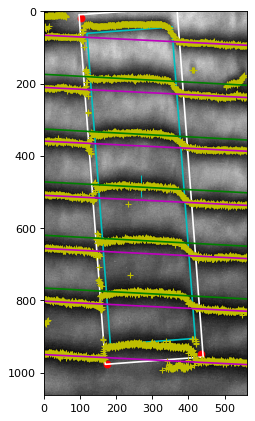

In [8]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
draw_gauge(axes, img_array, drawdata)

In [9]:
type(drawdata)

dict